### 2008 listed company median pb ratio diatribution chart

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from jqdata import *

In [4]:
trade_days = get_trade_days(start_date='2008-01-01', end_date='2023-05-01')

# Create a new DataFrame to store PB50 data
pb50_data = pd.DataFrame(columns=['date', 'pb50'])

# Get all stock codes
stocks = get_all_securities(types=['stock'])
stock_list = stocks.index.tolist()

for date in trade_days:
    # Get fundamentals data for the current date
    df = get_fundamentals(query(valuation.pb_ratio).filter(valuation.code.in_(stock_list)), date)
    pb50 = df.quantile(0.50)[0]
    
    # Append the date and PB50 data to the new DataFrame
    pb50_data = pb50_data.append({'date': date, 'pb50': pb50}, ignore_index=True)

# Sort by date
pb50_data = pb50_data.sort_values('date')

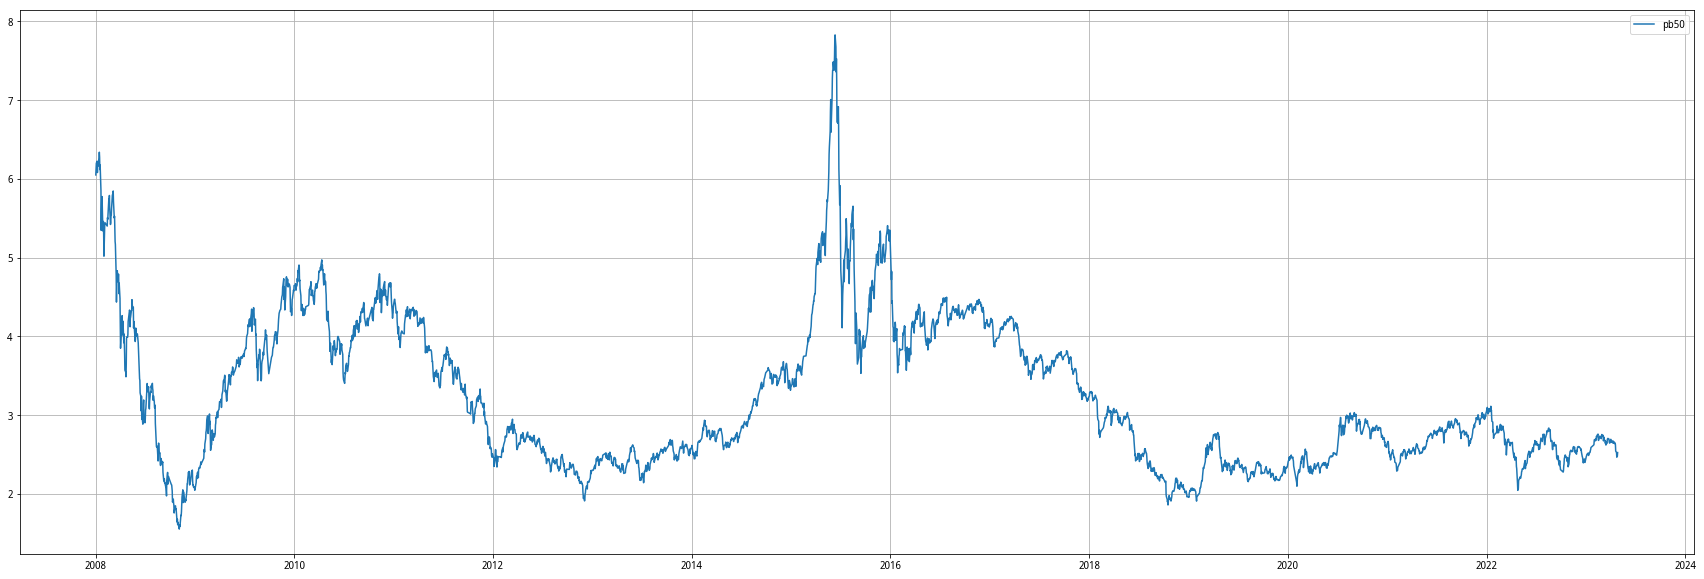

In [8]:
# Plotting the pb50 values
plt.figure(figsize=(30, 10))
plt.plot(pb50_data['date'], pb50_data['pb50'])
plt.grid()
plt.legend(['pb50'])
plt.show()

### 2022 all the companies revenue total

In [9]:
# get the code of the stock
all_stocks = get_all_securities(types=['stock'])

# create a new empty dataframe to store the dataset
df_total = pd.DataFrame()

# going through all the stocks
for stock in all_stocks.index:
    # get the revenue of each company
    q = query(income.operating_revenue).filter(income.code == stock)
    df = get_fundamentals(q, statDate='2022')

    # add the dataset to the dataframe if it is not empty
    if not df.empty:
        df_total = pd.concat([df_total, df])

# get the sum of the operating revenue
print(df_total['operating_revenue'].sum())

71312665257060.88


### Total revenue of all listed companies by industry in 2022

#### Jukuan first-class industry

In [6]:
industries = get_industries(name='sw_l1')

In [16]:
# Create a new empty DataFrame to store the dataset
df_total = pd.DataFrame()

# Create empty lists to store industry names and corresponding revenue
industry_names = []
industry_revenues = []

# Going through all the industries
for industry in industries.index:
    # Get the name of the current industry
    industry_name = industries.loc[industry, 'name']

    # Get all the stocks in the current industry
    stocks = get_industry_stocks(industry_code=industry)

    # Going through all the stocks in the current industry
    for stock in stocks:
        # Get the revenue of each company
        q = query(income.operating_revenue).filter(income.code == stock)
        df = get_fundamentals(q, statDate='2022')

        # Add the dataset to the DataFrame if it is not empty
        if not df.empty:
            # Add the industry information to the DataFrame
            df['sw_l1'] = industry_name
            df_total = pd.concat([df_total, df])

# Calculate the sum of the operating revenue for each industry
industry_revenue = df_total.groupby('sw_l1').sum()


In [17]:
# Create a DataFrame to store the industry names and revenue
industry_df = pd.DataFrame({'Name': industry_revenue.index, 'Revenue': industry_revenue['operating_revenue']})

# Sort the DataFrame by 'Revenue' column in descending order
industry_df_sorted = industry_df[['Name', 'Revenue']].sort_values(by='Revenue', ascending=False).reset_index(drop=True)

# Print the sorted DataFrame
industry_df_sorted

,Name,Revenue
0,建筑装饰I,8.476111e+12
1,石油石化I,8.375284e+12
2,银行I,5.852945e+12
3,交通运输I,4.913987e+12
4,非银金融I,3.952341e+12
5,汽车I,3.263400e+12
6,有色金属I,3.186207e+12
7,电气设备I,3.185649e+12
8,电子I,2.927556e+12
9,房地产I,2.724957e+12


#### Jukuan second-class industry

In [5]:
industries = get_industries(name='sw_l2')

In [18]:

# Create a new empty DataFrame to store the dataset
df_total = pd.DataFrame()

# Create empty lists to store industry names and corresponding revenue
industry_names = []
industry_revenues = []

# Going through all the industries
for industry in industries.index:
    # Get the name of the current industry
    industry_name = industries.loc[industry, 'name']

    # Get all the stocks in the current industry
    stocks = get_industry_stocks(industry_code=industry)

    # Going through all the stocks in the current industry
    for stock in stocks:
        # Get the revenue of each company
        q = query(income.operating_revenue).filter(income.code == stock)
        df = get_fundamentals(q, statDate='2022')

        # Add the dataset to the DataFrame if it is not empty
        if not df.empty:
            # Add the industry information to the DataFrame
            df['sw_l2'] = industry_name
            df_total = pd.concat([df_total, df])

# Calculate the sum of the operating revenue for each industry
industry_revenue = df_total.groupby('sw_l2').sum()

In [19]:
# Create a DataFrame to store the industry names and revenue
industry_df = pd.DataFrame({'Name': industry_revenue.index, 'Revenue': industry_revenue['operating_revenue']})

# Sort the DataFrame by 'Revenue' column in descending order
industry_df_sorted = industry_df[['Name', 'Revenue']].sort_values(by='Revenue', ascending=False).reset_index(drop=True)

# Print the sorted DataFrame
industry_df_sorted

,Name,Revenue
0,炼化及贸易II,7.657178e+12
1,基础建设II,4.522044e+12
2,国有大型银行II,3.691273e+12
3,物流II,3.681760e+12
4,保险II,3.276789e+12
5,房屋建设II,2.720987e+12
6,房地产开发II,2.686660e+12
7,工业金属II,2.082287e+12
8,普钢II,1.943545e+12
9,通信运营II,1.839048e+12


auth success 
